In [2]:
import pandas as pd
import numpy as np
import glob
from IPython.display import clear_output

batch_size = 80
max_iter = 50
active_col = 'PstP True Active'
pains_col = 'Passes PAINS Filter'
cluster_col = 'BT_0.4 ID'
pstp_iter_file = '../../ALDD-PstP-Results/results/setting_true/training_data/cumulative_50.csv.gz'

pstp_true_file = '../datasets/pstp_final_true_with_pains.csv.gz'
true_df = pd.read_csv(pstp_true_file)

res_list = []
for i in range(max_iter):
    tmp_df = pd.read_csv('../../ALDD-PstP-Results/results/setting_true/next_batch/iter_{}.csv.gz'.format(i))
    tmp_df['iter_num'] = i
    res_list.append(tmp_df)
    
tmp_df = pd.concat(res_list)[['Index ID', 'iter_num']]
res_df = pd.read_csv(pstp_iter_file)
res_df = pd.merge(tmp_df, res_df, on='Index ID')
assert tmp_df['Index ID'].unique().shape[0] == batch_size*max_iter
assert res_df['Index ID'].unique().shape[0] == batch_size*max_iter

# add ata
ata_df = res_df[res_df['Molecule'].str.contains('ATA')].copy()
ata_df[pains_col] = 1
res_df = res_df.merge(true_df[['Molecule', pains_col]], on='Molecule')
res_df = pd.concat([ata_df, res_df])
true_df = pd.concat([ata_df[true_df.columns], true_df])

---
# Summary and per-iteration cumulative hits

In [3]:
screened_actives_df = res_df[(res_df[active_col] == 1)]
true_actives_df = true_df[(true_df[active_col] == 1)]
total_hits, total_unique_hits = screened_actives_df.shape[0], screened_actives_df[cluster_col].unique().shape[0]
dataset_size, screened_size = true_df.shape[0], res_df.shape[0] 
true_total_hits, true_total_unique_hits = true_actives_df.shape[0], true_actives_df[cluster_col].unique().shape[0]
fraction_screened, fraction_hits_found, fraction_uhits_found = screened_size/dataset_size, total_hits/true_total_hits, total_unique_hits/true_total_unique_hits
hit_perc = true_total_hits/dataset_size
hits_expected = screened_size*(true_total_hits/dataset_size)

print('Batch size: {}. # iters: {}. Total selected cpds: {}.'.format(batch_size,  max_iter, screened_size))
print('Dataset size: {}. Total hits in dataset: {}. Total unique hits in dataset: {}'.format(dataset_size, true_total_hits, true_total_unique_hits))
print('Hit %: {:.2f}%. Hits expected in {} cpds: {:.2f} hits.'.format(100.0*hit_perc, screened_size, hits_expected))
print('Total hits found: {}. Total unique hits found: {}.'.format(total_hits, total_unique_hits))
print('Percent of dataset screened: {:.2f}%. Percent of hits found: {:.2f}%. Percent of unique hits found: {:.2f}%.'.format(100*fraction_screened, 
                                                                               100*fraction_hits_found,
                                                                               100*fraction_uhits_found))

Batch size: 80. # iters: 50. Total selected cpds: 4000.
Dataset size: 94044. Total hits in dataset: 143. Total unique hits in dataset: 127
Hit %: 0.15%. Hits expected in 4000 cpds: 6.08 hits.
Total hits found: 29. Total unique hits found: 27.
Percent of dataset screened: 4.25%. Percent of hits found: 20.28%. Percent of unique hits found: 21.26%.


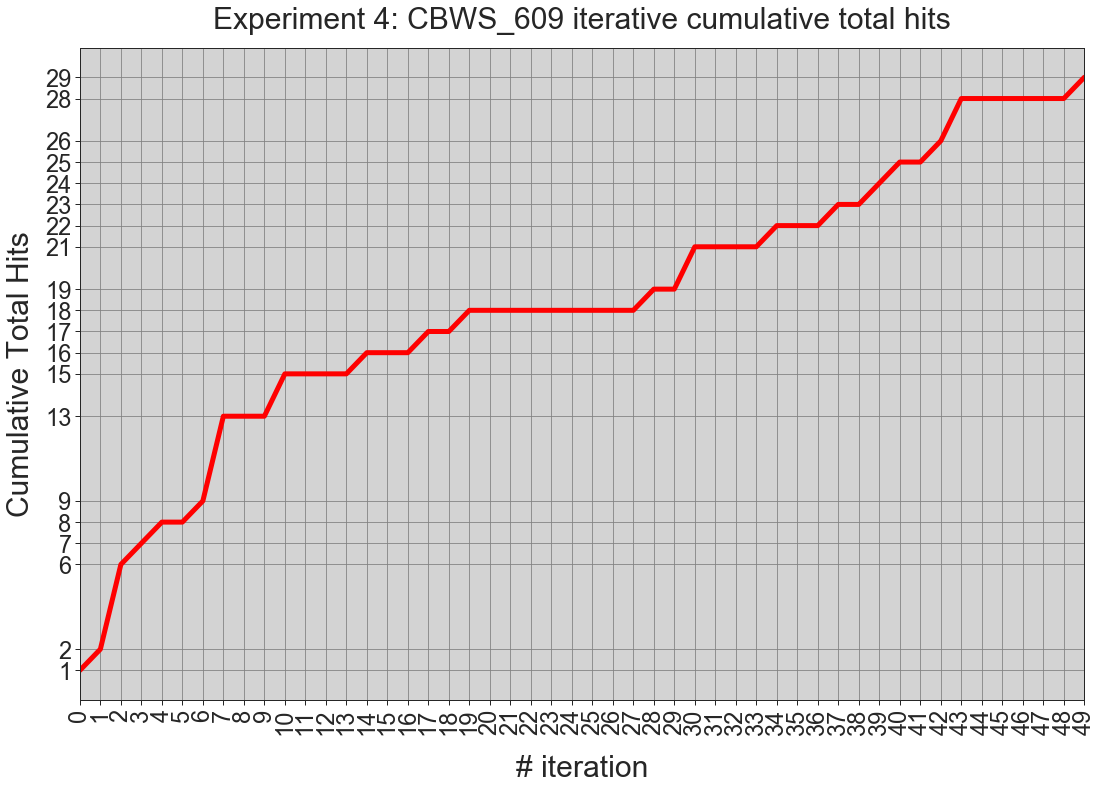

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks", rc={'axes.facecolor':'lightgrey'})
sns.set_context("paper", font_scale=2.68)
figsize=(18, 12)

hit_list = [0 for _ in range(max_iter)]
for i in range(max_iter):
    tmp_df = res_df[res_df['iter_num'] == i]
    cumsum = tmp_df[active_col].sum()
    if i > 0:
        cumsum += hit_list[i-1]  
    hit_list[i] = cumsum


fontsize=30
plt.figure(figsize=figsize);
plt.grid(True, color='grey')
sns.lineplot(x=np.arange(max_iter), y=hit_list, color='r', linewidth=5);
plt.xticks(range(50), rotation=90, ha='center'); plt.yticks(np.unique(hit_list));
plt.xlim([0, 49])
plt.ylabel('Cumulative Total Hits', fontsize=fontsize, labelpad=10);
plt.xlabel('# iteration', fontsize=fontsize, labelpad=20);
plt.title('Experiment 4: CBWS_609 iterative cumulative total hits', fontsize=fontsize, y=1.02);

---
# With PAINS Filter

In [13]:
screened_actives_df = res_df[(res_df[active_col] == 1) & (res_df[pains_col] == 1)]
true_actives_df = true_df[(true_df[active_col] == 1) & (true_df[pains_col] == 1)]
total_hits, total_unique_hits = screened_actives_df.shape[0], screened_actives_df[cluster_col].unique().shape[0]
dataset_size, screened_size = true_df.shape[0], res_df.shape[0] 
true_total_hits, true_total_unique_hits = true_actives_df.shape[0], true_actives_df[cluster_col].unique().shape[0]
fraction_screened, fraction_hits_found, fraction_uhits_found = screened_size/dataset_size, total_hits/true_total_hits, total_unique_hits/true_total_unique_hits
hit_perc = true_total_hits/dataset_size
hits_expected = screened_size*(true_total_hits/dataset_size)

print('Batch size: {}. # iters: {}. Total selected cpds: {}.'.format(batch_size,  max_iter, screened_size))
print('Dataset size: {}. Total hits in dataset: {}. Total unique hits in dataset: {}'.format(dataset_size, true_total_hits, true_total_unique_hits))
print('Hit %: {:.2f}%. Hits expected in {} cpds: {:.2f} hits.'.format(100.0*hit_perc, screened_size, hits_expected))
print('Total hits found: {}. Total unique hits found: {}.'.format(total_hits, total_unique_hits))
print('Percent of dataset screened: {:.2f}%. Percent of hits found: {:.2f}%. Percent of unique hits found: {:.2f}%.'.format(100*fraction_screened, 
                                                                               100*fraction_hits_found,
                                                                               100*fraction_uhits_found))

Batch size: 80. # iters: 50. Total selected cpds: 4000.
Dataset size: 94044. Total hits in dataset: 125. Total unique hits in dataset: 110
Hit %: 0.13%. Hits expected in 4000 cpds: 5.32 hits.
Total hits found: 20. Total unique hits found: 19.
Percent of dataset screened: 4.25%. Percent of hits found: 16.00%. Percent of unique hits found: 17.27%.


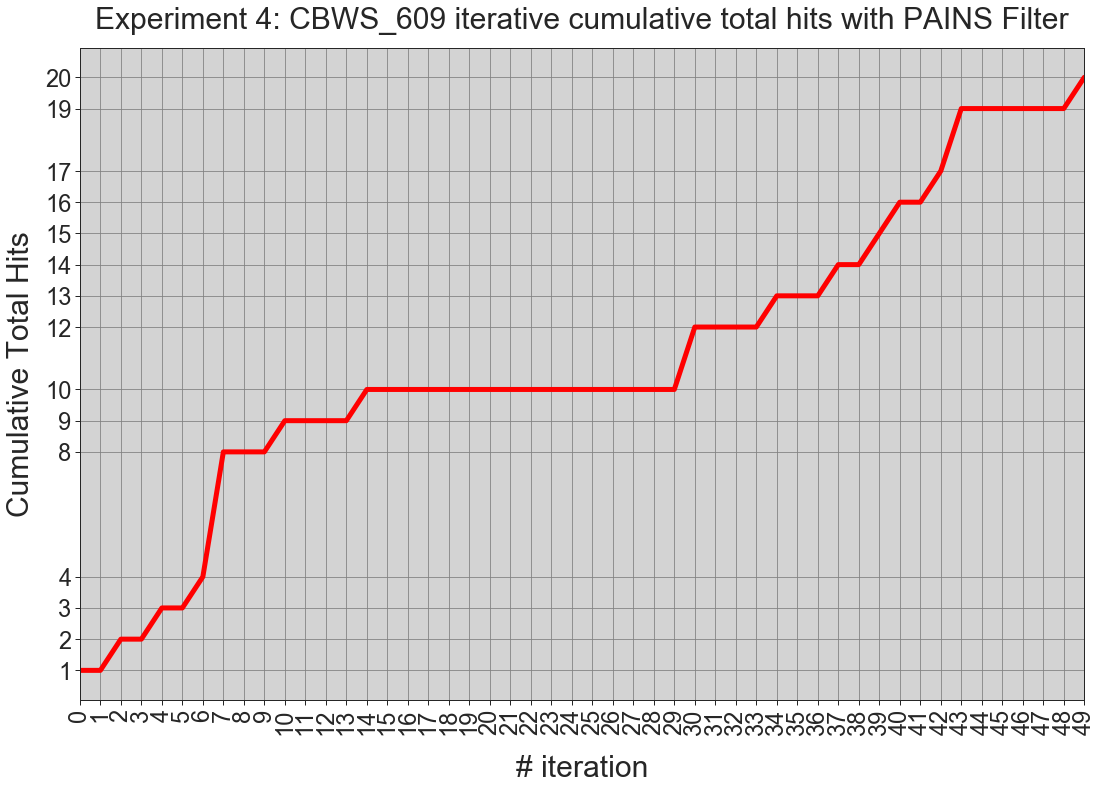

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks", rc={'axes.facecolor':'lightgrey'})
sns.set_context("paper", font_scale=2.68)
figsize=(18, 12)


hit_list = [0 for _ in range(max_iter)]
for i in range(max_iter):
    tmp_df = res_df[res_df['iter_num'] == i]
    tmp_df = tmp_df[tmp_df[pains_col] == 1]
    cumsum = tmp_df[active_col].sum()
    if i > 0:
        cumsum += hit_list[i-1]  
    hit_list[i] = cumsum

fontsize=30
plt.figure(figsize=figsize);
plt.grid(True, color='grey')
sns.lineplot(x=np.arange(max_iter), y=hit_list, color='r', linewidth=5);
plt.xticks(range(50), rotation=90, ha='center'); plt.yticks(np.unique(hit_list));
plt.xlim([0, 49])
plt.ylabel('Cumulative Total Hits', fontsize=fontsize, labelpad=10);
plt.xlabel('# iteration', fontsize=fontsize, labelpad=20);
plt.title('Experiment 4: CBWS_609 iterative cumulative total hits with PAINS Filter', fontsize=fontsize, y=1.02);

---
# Unlabeled pool RF Predictions and Uncertainty Distribution across iterations

In [63]:
from active_learning_dd.models.supervised  import *
import pandas as pd
import numpy as np
import glob
import warnings
warnings.simplefilter("ignore")
%load_ext autoreload
%autoreload 2

def run_rf(true_df, iter_range, iter_hit_list, cumulative_hit_list,
           task_col='PstP', hit_limit=143, 
           topk = 80, uncert_method='least_confidence'):
    train_file_fmt = '../../ALDD-PstP-Results/results/setting_true/training_data/cumulative_{}.csv.gz'
    active_col = 'PstP True Active'
    for iter_max in iter_range:
        train_file = train_file_fmt.format(iter_max)

        train_df = pd.read_csv(train_file)
        unlabeled_df = true_df.copy()
        unlabeled_df = unlabeled_df.drop_duplicates('Index ID')
        unlabeled_df = unlabeled_df[~unlabeled_df['Index ID'].isin(train_df['Index ID'].values)]

        X_train = np.vstack([ (np.fromstring(x, 'u1') - ord('0')).astype(np.uint16) for x in train_df['Morgan FP_2_1024'] ])
        X_test = np.vstack([ (np.fromstring(x, 'u1') - ord('0')).astype(np.uint16) for x in unlabeled_df['Morgan FP_2_1024'] ])
        y_train, y_test = train_df[active_col].values.reshape(-1,1), unlabeled_df[active_col].values.reshape(-1,1)
        
        model = sklearn_randomforest.SklearnRF(task_names=[task_col],
                                               n_estimators=50,
                                               max_features="log2",
                                               min_samples_leaf=1,
                                               n_jobs=1,
                                               class_weight="balanced",
                                               random_state=20183112,
                                               oob_score=False,
                                               verbose=0)
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        test_uncert = model.get_uncertainty(X_test, uncert_method, [])

        test_actives = np.where(y_test == 1)[0]
        test_inactives = np.where(y_test == 0)[0]
        
        x = test_preds[:,0].argsort()[::-1][:topk]
        y = test_uncert[:,0].argsort()[::-1][:topk]
        overlap = np.intersect1d(x, y).shape[0]
        
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set_context("paper")
        sns.set(font_scale=1.9)

        figsize=(22, 10)
        fig_title = 'Task {} RF predictions kernel density estimate at iteration {}\n'.format(task_col, iter_max)
        fig_title+= 'with {} training compounds and {} unlabeled pool compounds.'.format(y_train.shape[0], y_test.shape[0])
        fig_title += ' # Hits in dataset: {}.' .format(hit_limit)
        fig_title += '\n\n# Hits so far: {}. # Hits found from this iteration: {}.'.format(cumulative_hit_list[iter_max-1], 
                                                                                           iter_hit_list[iter_max])
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        sns.distplot(test_preds[test_actives,0], kde_kws={"linewidth": 2}, ax=axes[0], color='darkgreen')
        sns.distplot(test_preds[test_inactives,0], kde_kws={"linewidth": 2}, ax=axes[0], color='coral')
        axes[0].legend(['hits', 'non-hits'])
        axes[0].set_title('RF predictions distribution')

        sns.distplot(test_uncert[test_actives,0], kde_kws={"linewidth": 2}, ax=axes[1], color='darkgreen')
        sns.distplot(test_uncert[test_inactives,0], kde_kws={"linewidth": 2}, ax=axes[1], color='coral')
        axes[1].legend(['hits', 'non-hits'])
        axes[1].set_title('RF uncertainty (distance from 0.5) distribution')

        fig.suptitle(fig_title)
        fig.tight_layout()
        fig.subplots_adjust(top=.75)
        #plt.savefig('./exp4/task_{}_{}.png'.format(task_col, iter_max))
        plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
cumulative_hit_list = [0 for _ in range(50)]
iter_hit_list = [0 for _ in range(50)]
for i in range(50):
    tmp_df = res_df[res_df['iter_num'] == i]
    cumsum = tmp_df[active_col].sum()
    iter_hit_list[i] = cumsum
    
    if i > 0:
        cumsum += hit_list[i-1]  
    cumulative_hit_list[i] = cumsum

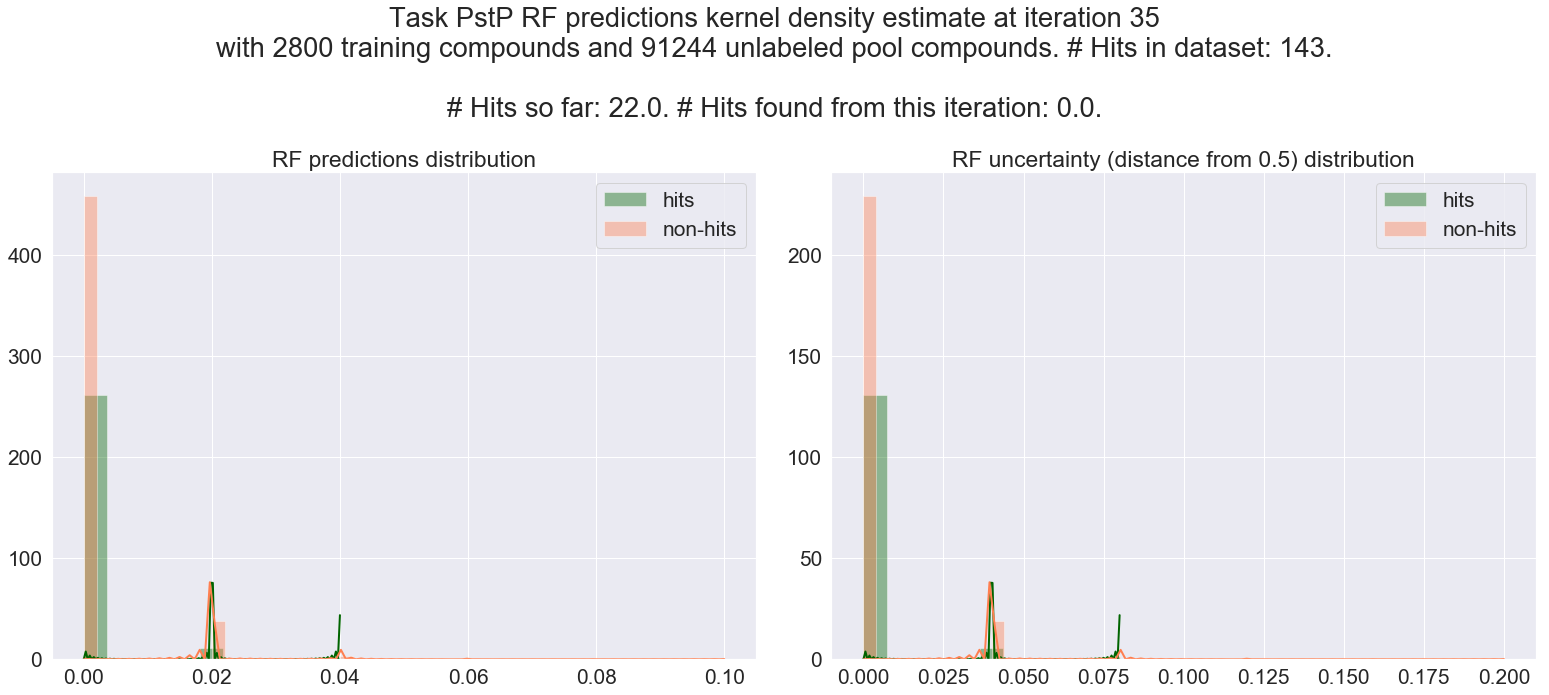

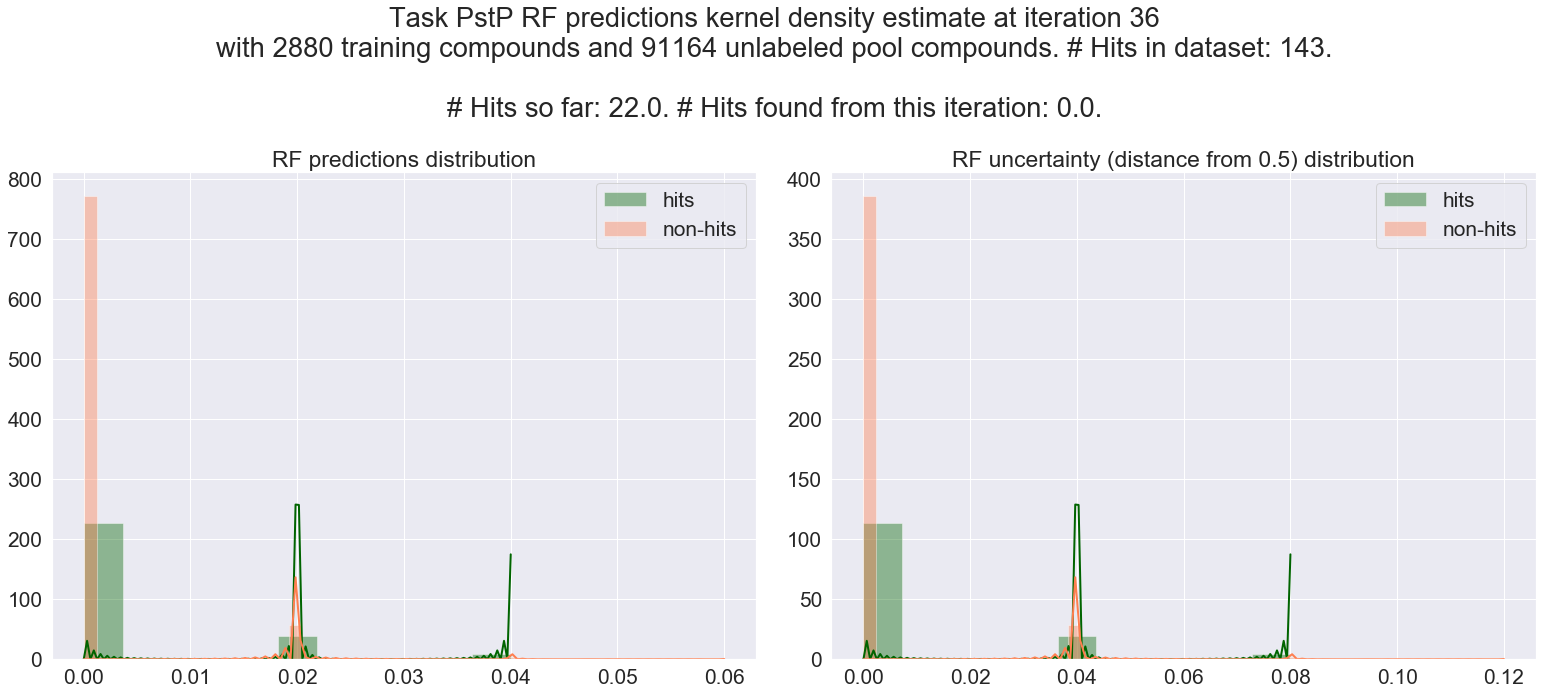

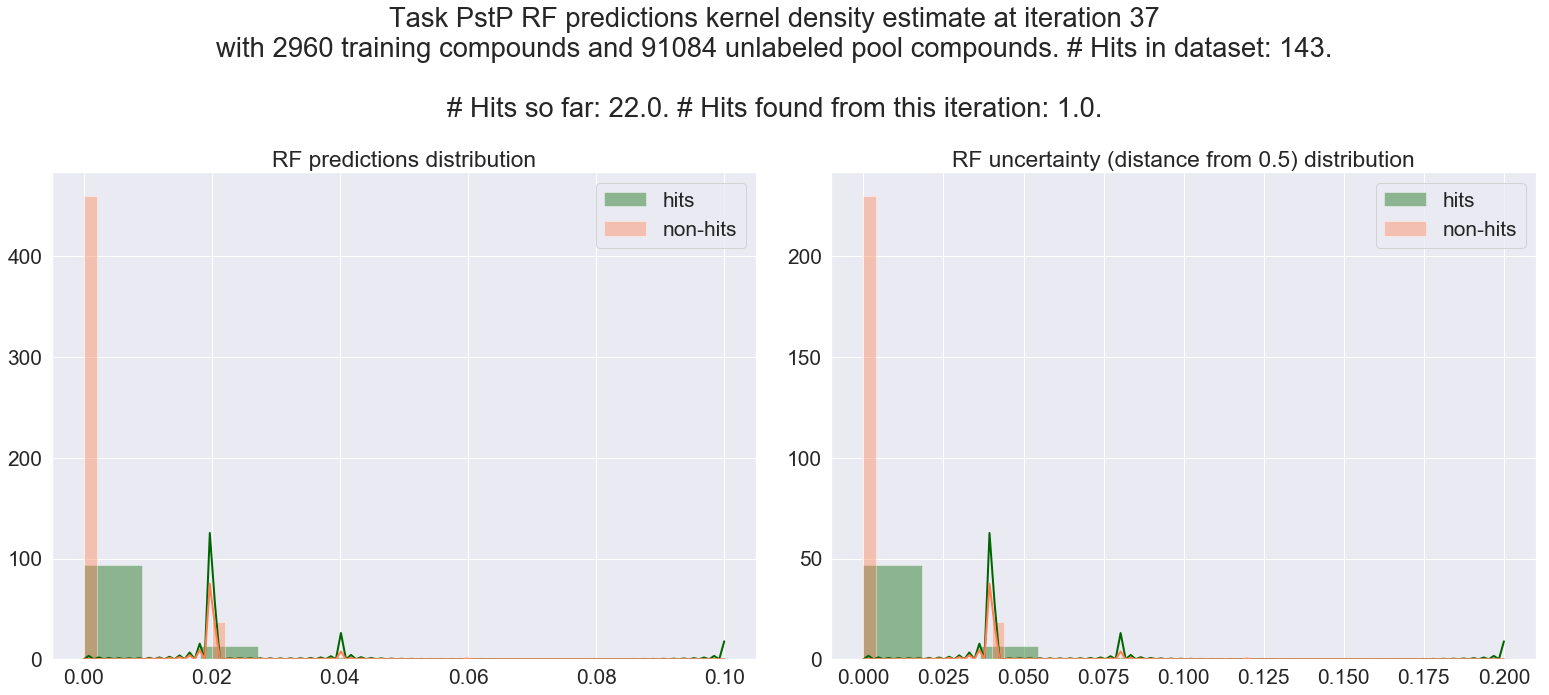

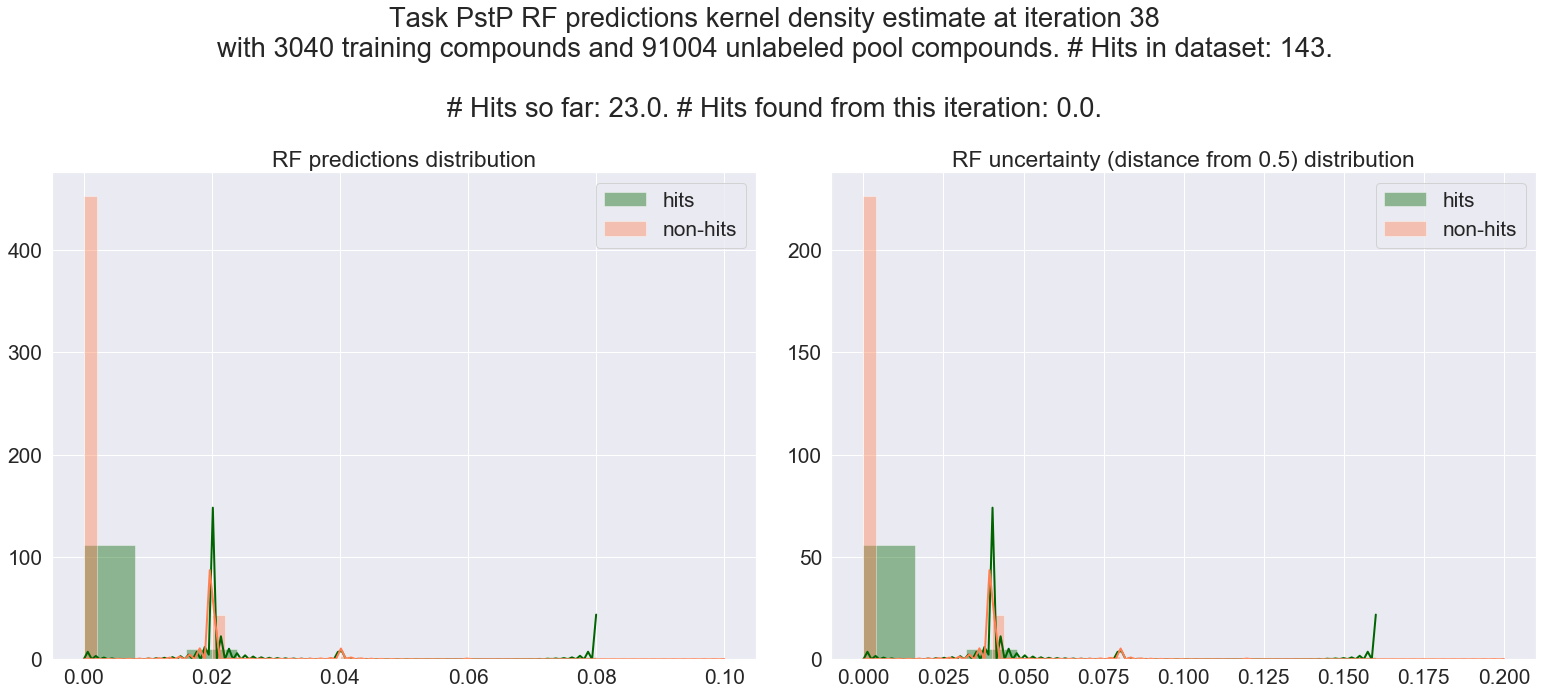

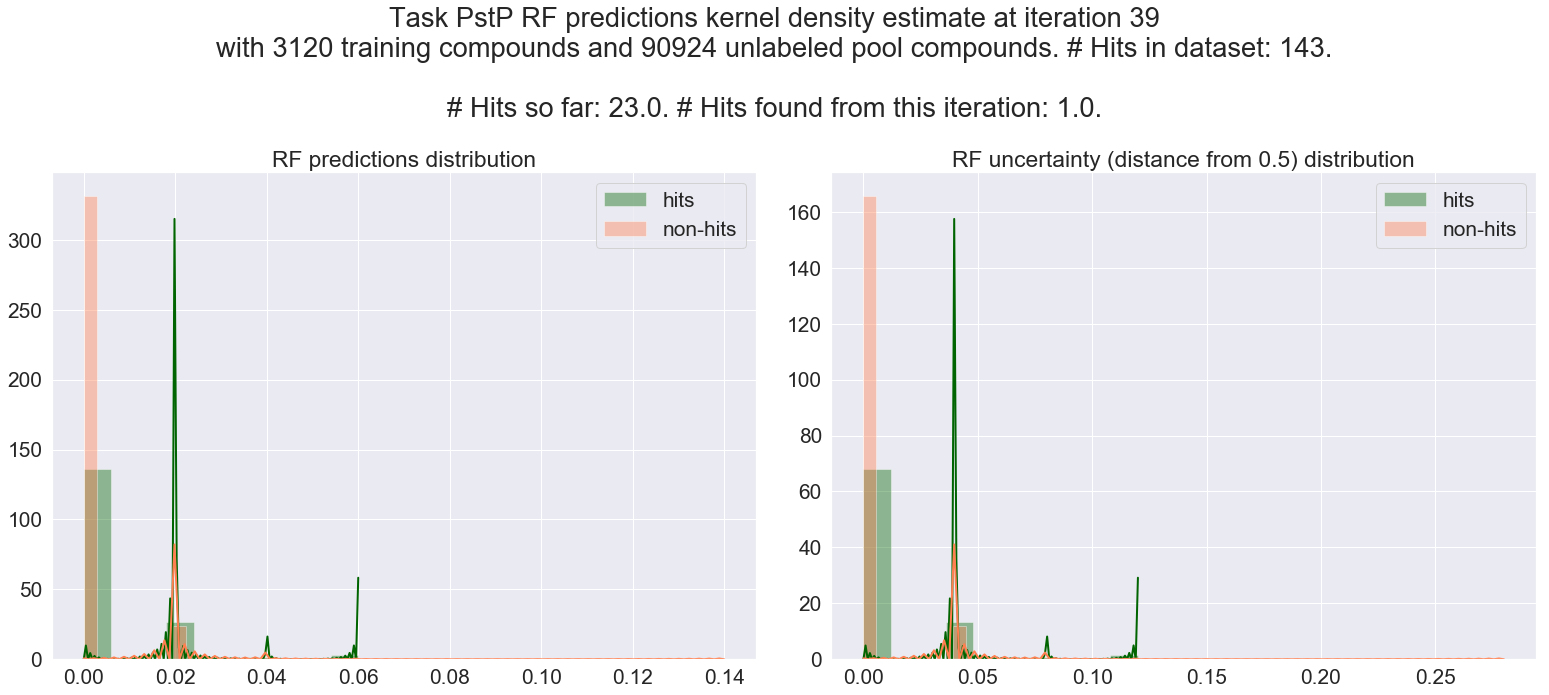

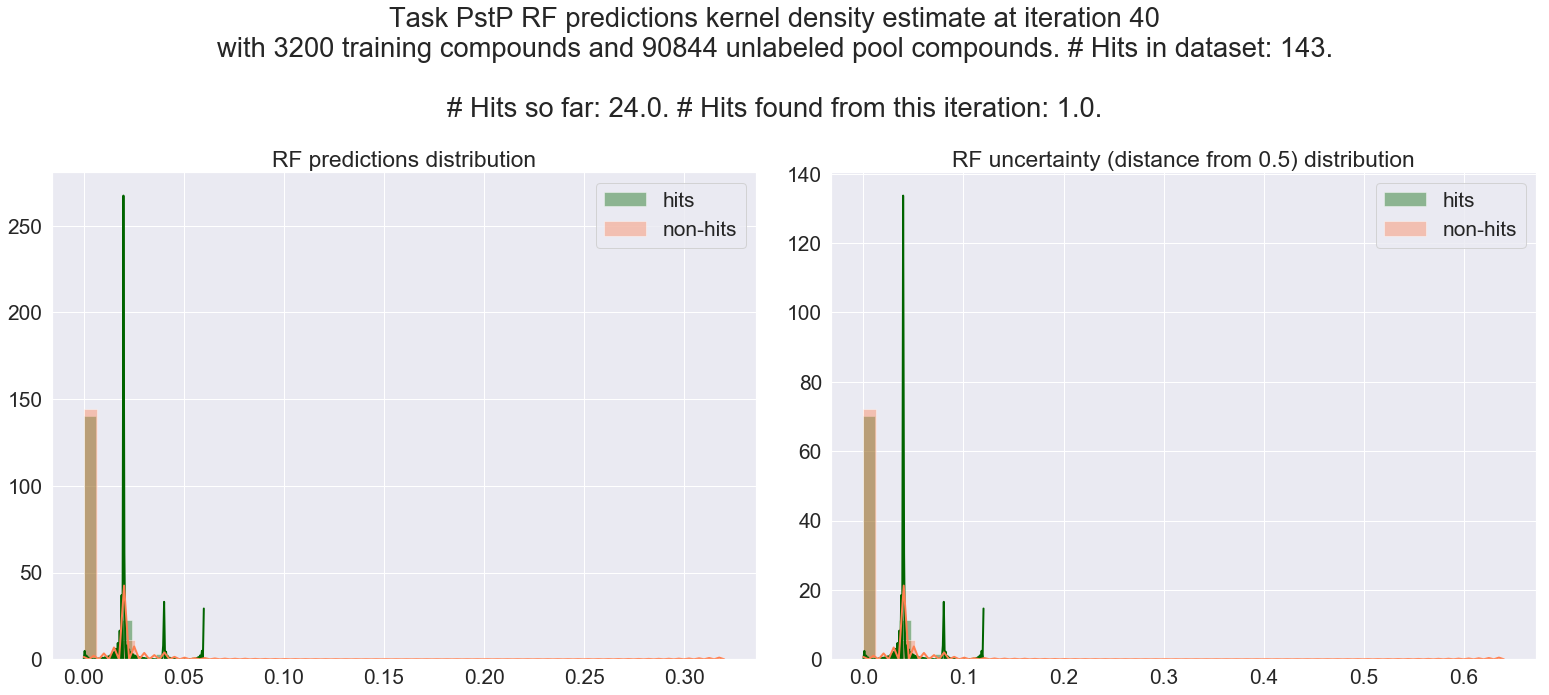

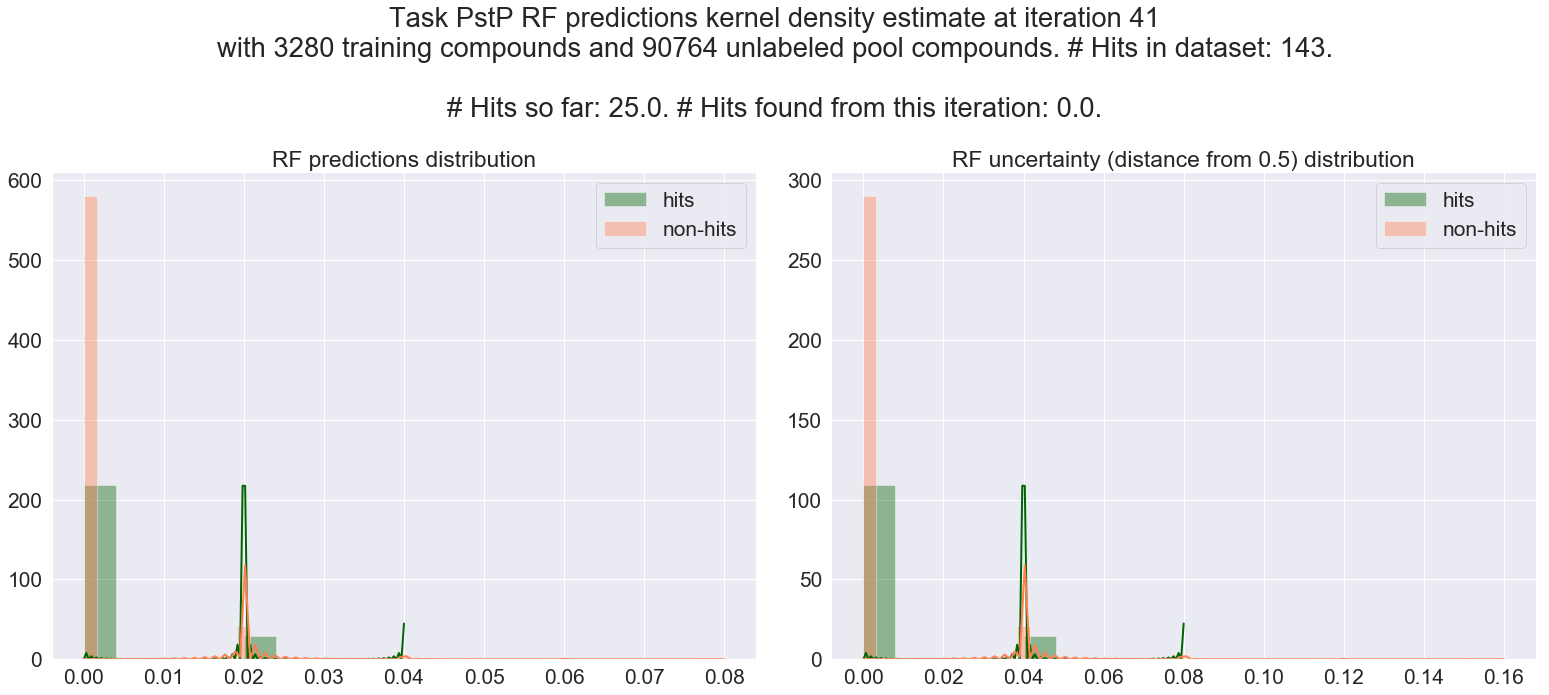

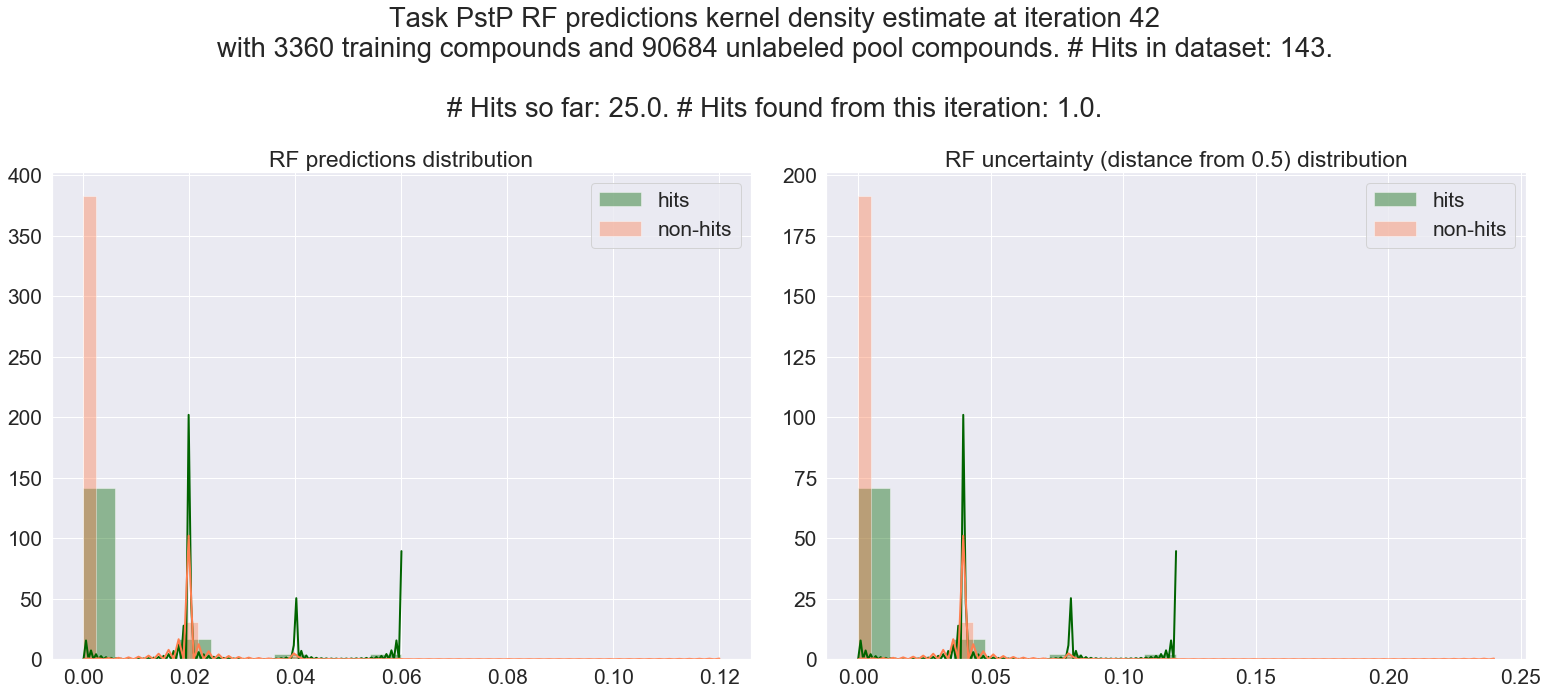

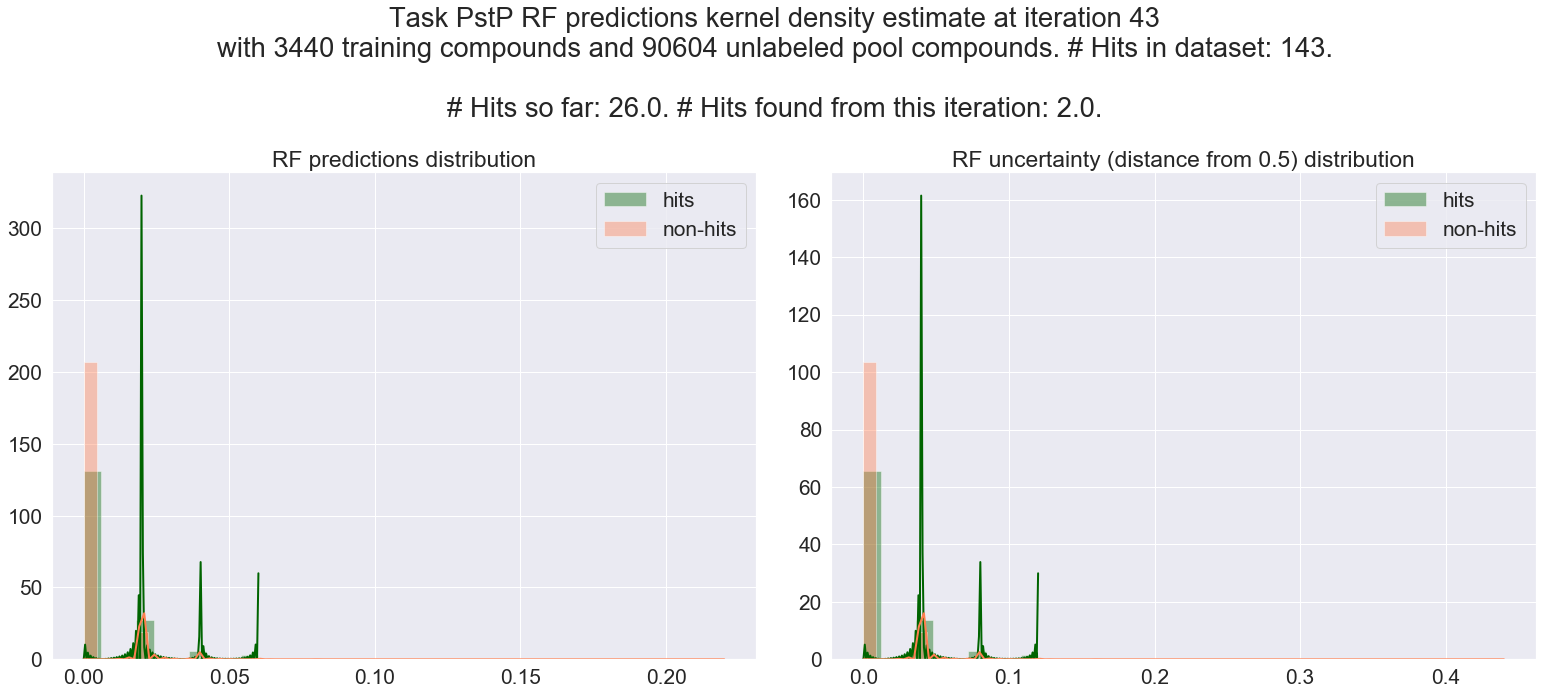

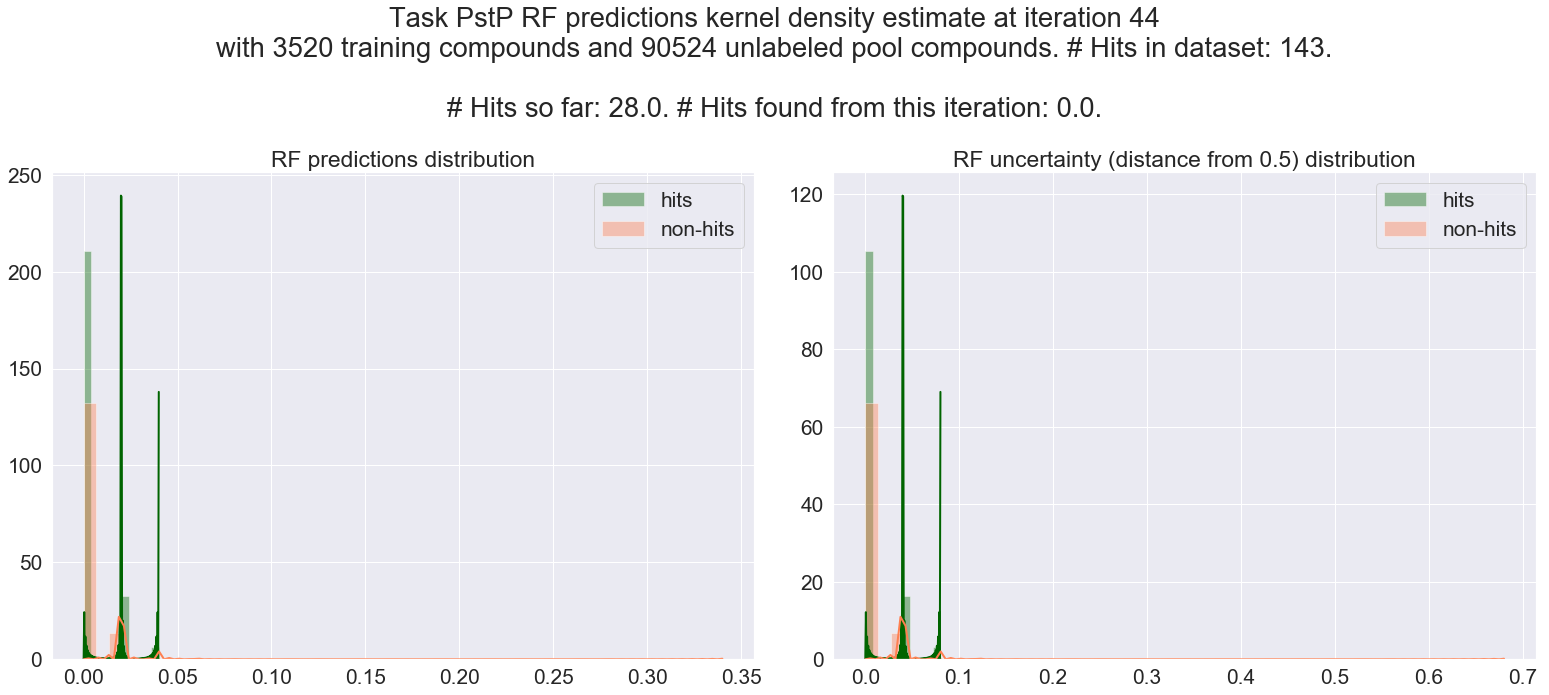

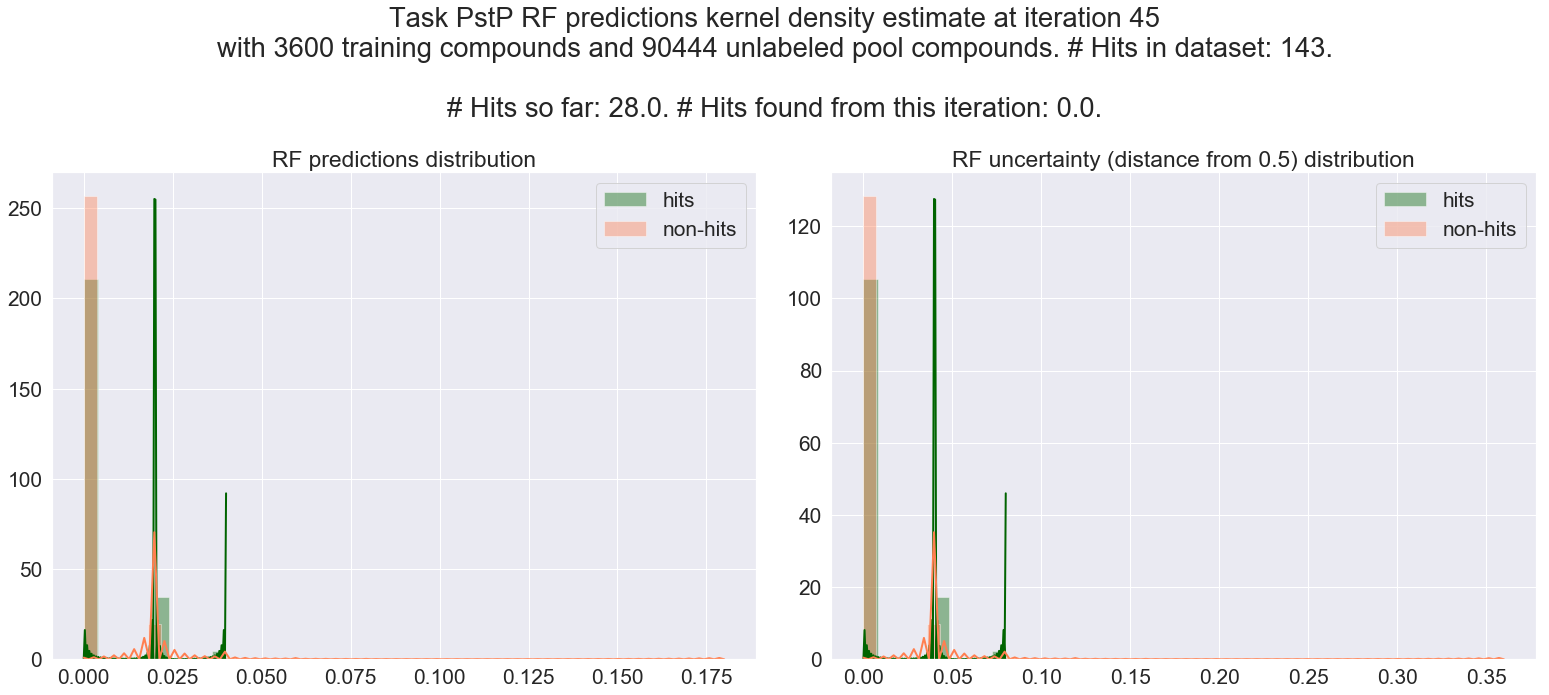

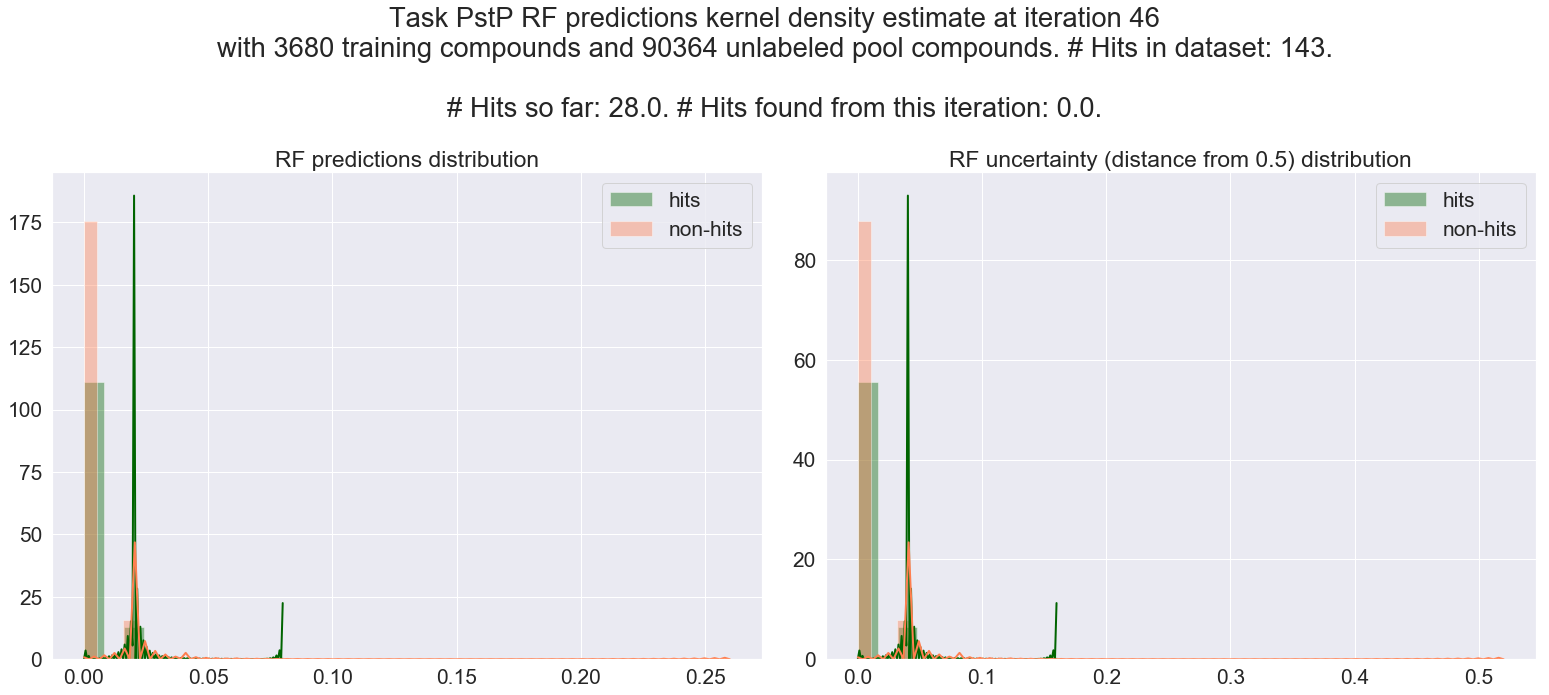

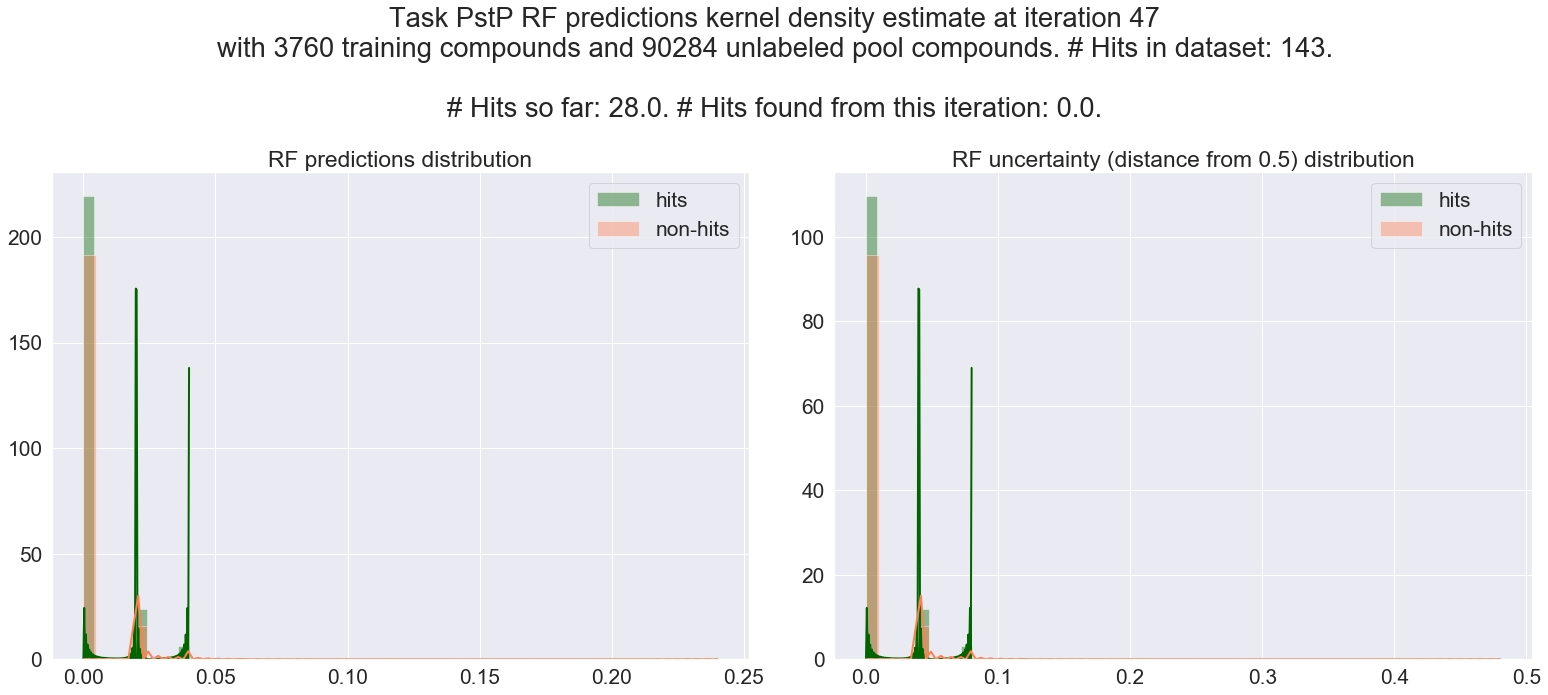

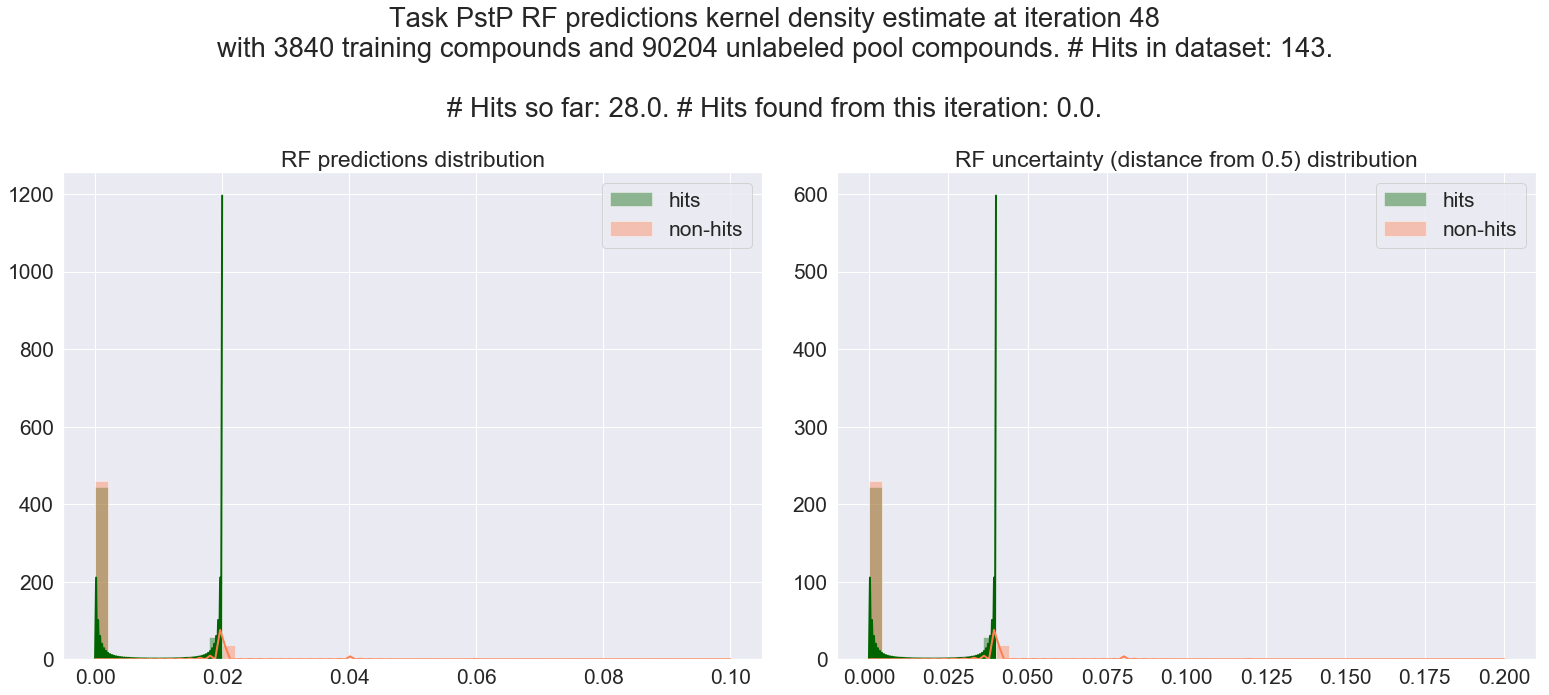

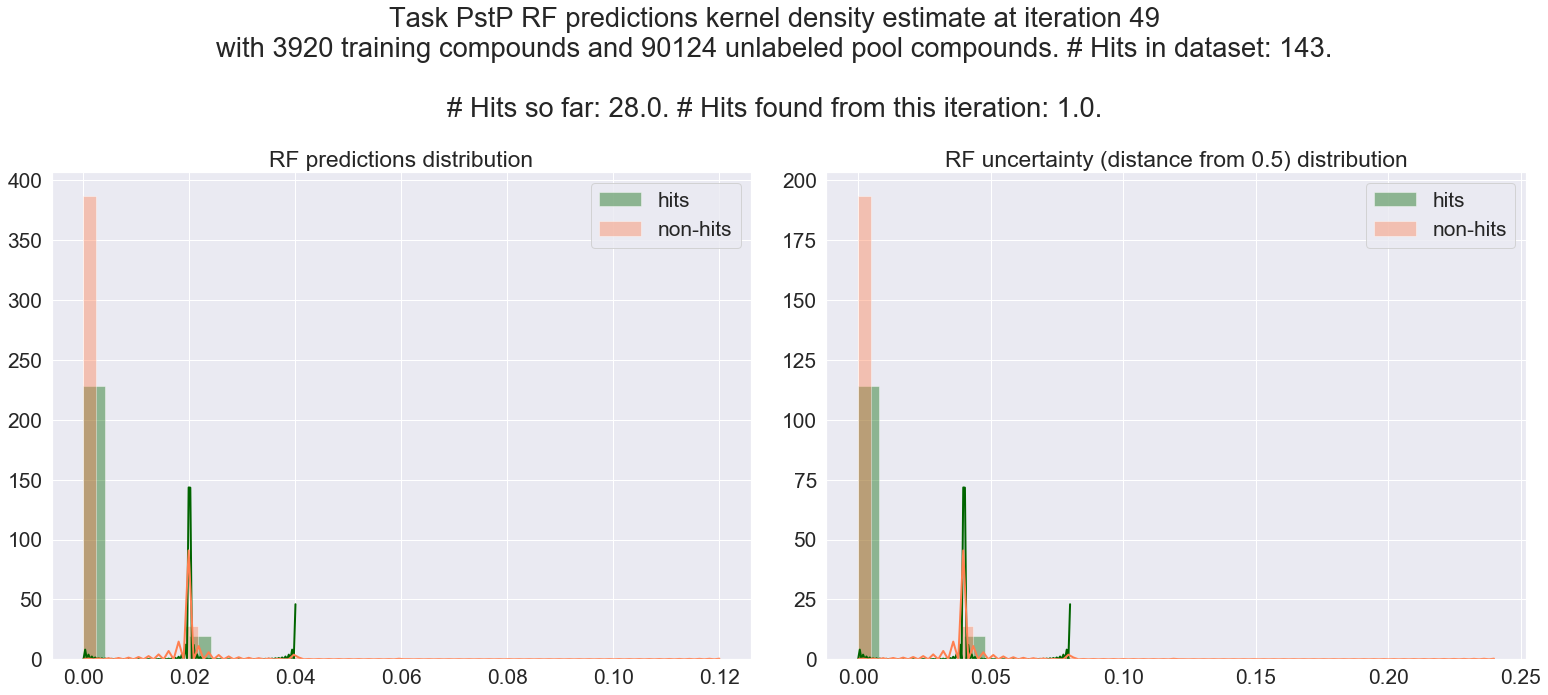

In [70]:
change_iters = np.arange(35, 50)
run_rf(true_df, change_iters, iter_hit_list, cumulative_hit_list)